Noah Wong
Mathematical Modeling

In [1]:
using PyPlot

Noah Wong
Mathematical Modeling

Question 1

In [4]:
A(x) = (4./x) + 6 - 5*(0.997).^x

A (generic function with 1 method)

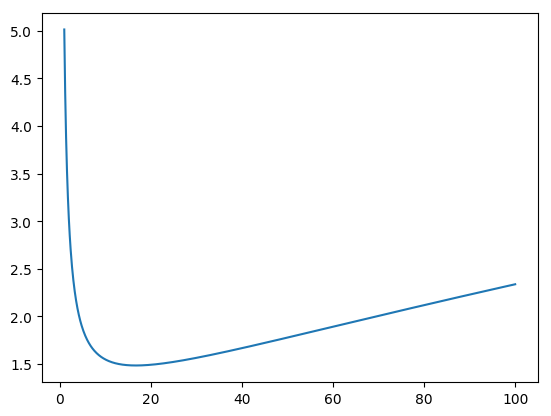

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60db45ead0>

In [6]:
t = 1.0:0.1:100.0;
y = A(t)
plot(t,y)

In [41]:
dA(x) = -(4/x^2) - 5*(log(0.997))*(0.997)^x
ddA(x) = (8/x^3) - 5*(log(0.997)^2)*(0.997)^x

ddA (generic function with 1 method)

In [52]:
function Newton(w1,N) 
    x=w1;
    for n=2:N
        #println(x)
        x= x - dA(x)/ddA(x)
    end
    return x
end

Newton (generic function with 2 methods)

In [54]:
Newton(10,20)

16.73305471208393

Estimating the minimum with Newton's method gives us 16.733... 

In [44]:
function Minimum(a,b)
    n = b-a 
    minimum = A(a)
    minimum_n = a
    for i = 0:n
        if minimum > A(i+a)
            minimum = A(i+a)
            minimum_n = i+a
        end
    end
    
    return minimum,minimum_n
end


Minimum (generic function with 1 method)

In [62]:
#The minimum of the integer values from 1 to 1000 for the average cost
#We stop at 1000 since A(x) only increases as x increases
Minimum(1,1000)

(1.484264961220581, 17)

The mininum average cost is at n = 17 with average 1.48 cents

In [56]:
function Maximum(a,b)
    n = b-a 
    maximum = A(a)
    maximum_n = a
    for i = 0:n
        if maximum < A(i+a)
            maximum = A(i+a)
            maximum_n = i+a
        end
    end
    
    return maximum,maximum_n
end

Maximum (generic function with 1 method)

In [60]:
Maximum(10,35)

(1.6133734720699433, 35)

The maximum average cost between n = 10 and n = 35 is n =35 with the average cost 1.61 cents

2(c) and (d) 
This programs test n values until it finds the first n value that is 10% or 1% away from q = 0.003. It then returns n and the interval of the 
the 

In [38]:
function ntest(n, int)
    q = 0.003
    check = true
    i = 0
    lower_bound = 100
    upper_bound = 100
    
    while(check)
        n = n + 1
        i += 1
        a = 4*n + n^2
        b = -(2*q *n*n + 4*n)
        c = (q*n)^2
        
        determinant = b^2 - (4 * a * c)
        
        lower_bound = (-b - sqrt(determinant))/(2*a)
        upper_bound = (-b + sqrt(determinant))/(2*a)
        
        if(abs(lower_bound- q ) <int && abs(upper_bound - q) < int)
            check = false
        end
        if (i > 1000000000)
            print("failed")
            return lower_bound, upper_bound
        end 
    end
    return n, lower_bound, upper_bound    
end

ntest (generic function with 1 method)

In [40]:
println(ntest(100000,0.0003))
println(ntest(10000000,0.00003))

(146183, 0.0027271983991336794, 0.003299999641731788)
(13425863, 0.002970296145122293, 0.003029999999625752)


It takes 146,183 tests to determine the failure rate within 10%
It takes 13,425,863 test to determine the failure rate within 1% 